# MRI Longitudinal Data EDA and Dementia Prediction

#### refernces:

## Imports

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [38]:
long_df = pd.read_csv('oasis_longitudinal.csv')
cross_df = pd.read_csv('oasis_cross-sectional.csv')

In [39]:
long_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [40]:
cross_df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [41]:
print('Longitudinal df shape: '+str(long_df.shape))
print('Cross-sectional df shape: '+str(cross_df.shape))


Longitudinal df shape: (373, 15)
Cross-sectional df shape: (436, 12)


In [42]:
print(cross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB
None


In [43]:
print(long_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
None


## Data Preprocessing

In [44]:
long_df = long_df.loc[long_df['Visit']==1]
long_df = long_df.reset_index(drop=True)

In [45]:
long_df.drop(columns=['Subject ID','Hand','MRI ID','Visit','MR Delay'],inplace=True)
cross_df.drop(columns=['Hand', 'Delay', 'ID'], inplace=True)

In [46]:
long_df = long_df.rename(columns={'M/F':'Male/Female'})
cross_df = cross_df.rename(columns={'M/F':'Male/Female'})

In [47]:
#encode non numerical columns
long_df['Group'] = long_df['Group'].apply(lambda x : 1 if x=='Demented' else 0)
long_df['Male/Female'] = long_df['Male/Female'].apply(lambda x : 1 if x=='M' else 0)
cross_df['Male/Female'] = cross_df['Male/Female'].apply(lambda x : 1 if x=='M' else 0)

In [48]:
long_df.head()

,Group,Male/Female,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,1,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [49]:
cross_df.head()

,Male/Female,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,1,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,1,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


In [50]:
print('NaNs in longitudinal df:')
long_df.isna().sum()

NaNs in longitudinal df:


Group          0
Male/Female    0
Age            0
EDUC           0
SES            8
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [51]:
print('NaNs in cross-sectional df:')
cross_df.isna().sum()

NaNs in cross-sectional df:


Male/Female      0
Age              0
Educ           201
SES            220
MMSE           201
CDR            201
eTIV             0
nWBV             0
ASF              0
dtype: int64

## Delete NaNs and Imputation (SES column)

In [52]:
long_df['SES'] = long_df['SES'].fillna(long_df['SES'].median())
cross_df = cross_df.dropna(how='any');

In [53]:
print(long_df)
print(cross_df)


     Group  Male/Female  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0        0            1   87    14  2.0  27.0  0.0  1987  0.696  0.883
1        1            1   75    12  2.0  23.0  0.5  1678  0.736  1.046
2        0            0   88    18  3.0  28.0  0.0  1215  0.710  1.444
3        0            1   80    12  4.0  28.0  0.0  1689  0.712  1.039
4        1            1   71    16  2.0  28.0  0.5  1357  0.748  1.293
..     ...          ...  ...   ...  ...   ...  ...   ...    ...    ...
145      1            1   73    12  2.0  23.0  0.5  1661  0.698  1.056
146      0            0   66    13  2.0  30.0  0.0  1495  0.746  1.174
147      1            0   72    16  3.0  24.0  0.5  1354  0.733  1.296
148      1            1   80    16  1.0  28.0  0.5  1704  0.711  1.030
149      0            0   61    13  2.0  30.0  0.0  1319  0.801  1.331

[150 rows x 10 columns]
     Male/Female  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
0              0   74   2.0  3.0  29.0  0.0  1344  0.743  1

In [54]:
print(long_df.isna().sum())
print(cross_df.isna().sum())

Group          0
Male/Female    0
Age            0
EDUC           0
SES            0
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64
Male/Female    0
Age            0
Educ           0
SES            0
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [55]:
print(long_df.shape)
print(cross_df.shape)

(150, 10)
(216, 9)


### The SES value

In order to preserve the ascending level order of CDR and SES, the values of SES was reversed from 1 (highest) to 5 (lowest) to 1 (lowest) to 5 (highest) SES.

In [65]:
long_df['SES'] = long_df['SES'].map({5:1,4:2,3:3,2:4,1:5})

In [66]:
long_df.head()

,Group,Male/Female,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,4,27.0,0.0,1987,0.696,0.883
1,1,1,75,12,4,23.0,0.5,1678,0.736,1.046
2,0,0,88,18,3,28.0,0.0,1215,0.710,1.444
3,0,1,80,12,2,28.0,0.0,1689,0.712,1.039
4,1,1,71,16,4,28.0,0.5,1357,0.748,1.293


## EDA

From looking at the pairwise correlation heatmap of the columns, you can see that the corrleation of two specific columns stand out. 'Group' and 'CDR' have a correlation of .91. This is important to note in the case we choose to extend the training dataset by including the cross-sectional data. Due to the high correlation and because both datasets contain 'CDR' as a column, by concatting the preprocessed datasets, the same solution to the problem at hand can be accomplished.

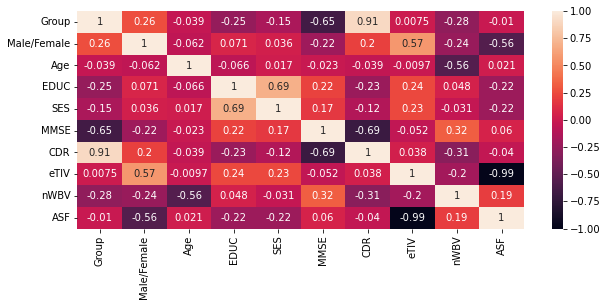

In [67]:
correlation = long_df.corr()
plt.figure(figsize=(10,4))
sns.heatmap(correlation,annot=True,vmin=-1)
plt.show()

In [68]:
long_df.isna().sum()

Group          0
Male/Female    0
Age            0
EDUC           0
SES            0
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

<Figure size 720x576 with 0 Axes>

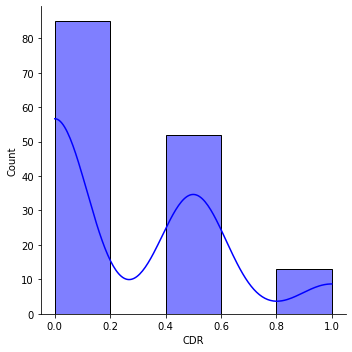

In [69]:
# distribution of target variable 
plt.figure(figsize=(10,8))
sns.displot(x='CDR', data=long_df, bins=5, kde=True, color='blue')

In [78]:
gender_labels = long_df['Male/Female'].value_counts()
list(gender_labels.index)

[0, 1]

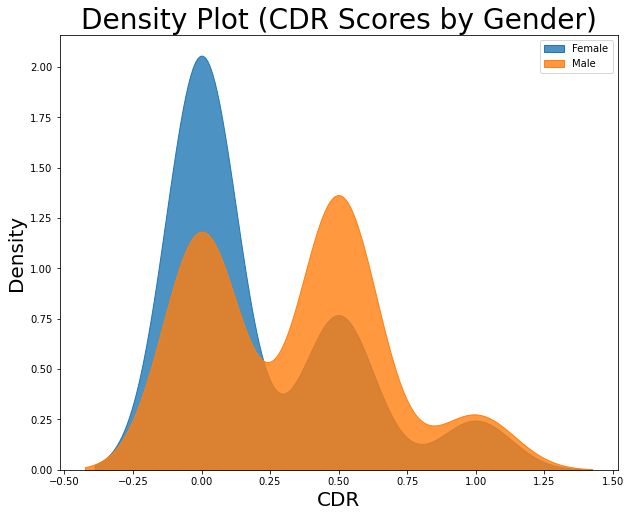

In [91]:
gender_index = list(gender_labels.index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(10, 8))

# Plot each building
for i in gender_index:
    # Select the SES category
    subset = long_df[long_df['Male/Female'] == i]
    
    # Density plot of CDR scores
    sns.kdeplot(subset['CDR'], label = i, shade = True, alpha = 0.8);
# label the plot
plt.xlabel('CDR', size = 20);
plt.ylabel('Density', size = 20); 
plt.title('Density Plot (CDR Scores by Gender)', size = 28);
plt.legend(labels=["Female","Male"])
plt.savefig('Gender_CDR_kdeplot.png')


In the plot above, you can see that females have a higher density of a 0 CDR score than males. Females additionally have a lower desnity in the CDR scores of 0.5 and above as well (which in this project is synonomous to the demented)

In [74]:
ses_labels = long_df['SES'].value_counts()
list(ses_labels.index)

[4, 3, 5, 2, 1]

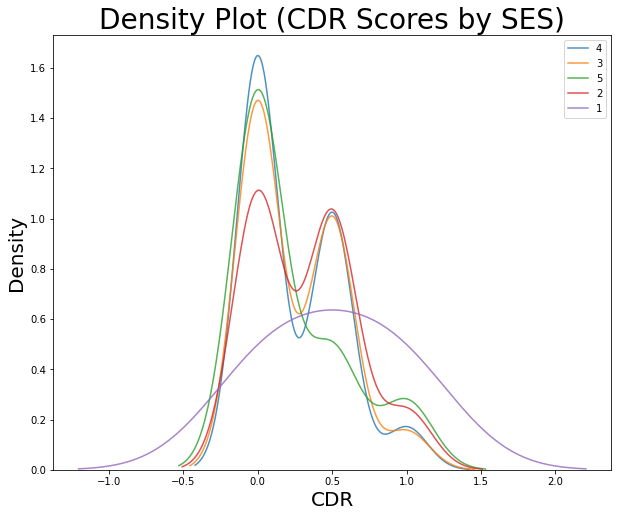

In [90]:
ses_index = list(ses_labels.index)

# Plot of distribution of scores for building categories
plt.figure(figsize=(10, 8))

# Plot each building
for i in ses_index:
    # Select the SES category
    subset = long_df[long_df['SES'] == i]
    
    # Density plot of CDR scores
    sns.kdeplot(subset['CDR'], label = i, shade = False, alpha = 0.8);
# label the plot
plt.xlabel('CDR', size = 20);
plt.ylabel('Density', size = 20); 
plt.title('Density Plot (CDR Scores by SES)', size = 28);
plt.legend(labels=["4","3","5","2","1"])
plt.savefig('SES_CDR_kdeplot.png')


As stated before, we reversed the SES so 5 is the highest SES score while 1 is the lowest. Keeping that in mind, we can see that participants with a higher SES score had a higher density for when CDR is 0 (Nondemented). 

<Figure size 720x576 with 0 Axes>

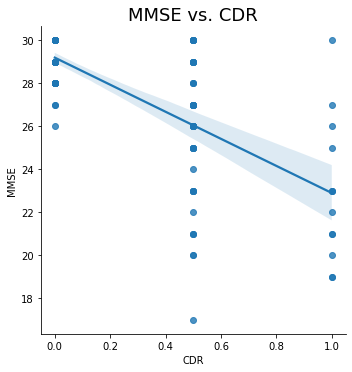

In [95]:
plt.figure(figsize=(10,8))
sns.lmplot(x='CDR', y='MMSE', data=long_df)
plt.title('MMSE vs. CDR', size = 18);

Although not the best relationship is shown, you can see that those with higher MMSE (Mini Mental State Exam) have a higher likelihood of having a CDR of 0 (Nondemented).

<Figure size 720x576 with 0 Axes>

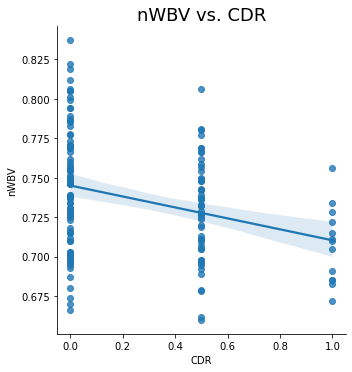

In [101]:
plt.figure(figsize=(10,8))
sns.lmplot(x='CDR', y='nWBV', data=long_df)
plt.title('nWBV vs. CDR', size = 18);